## Car Price Prediction By Machine Learning

#### One of the main areas of research in Machine learning is the Prediction of the Price of Cars. It is based on finance and the                       marketing domain.
#### It is a major research topic in machine learning because the price of a car depends on many factors.

### 1. Problem Statement :-

####  This project aims to predict the Price of an used Car by taking it's Company name, it's Model name, Year of Purchase, and                       other parameters.

### 2. Dataset:-

* The Data is taken from Kaggle.
* https://www.kaggle.com/datasets/balaka18/quikr-cars-scraped.

### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import klib
import warnings
warnings.filterwarnings("ignore")

### Load Dataset

In [3]:
df=pd.read_csv('quikr_car.csv')

In [4]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [5]:
df.shape

(892, 6)

In [6]:
df.describe()

,name,company,year,Price,kms_driven,fuel_type
count,892,892,892,892,840,837
unique,525,48,61,274,258,3
top,Honda City,Maruti,2015,Ask For Price,"45,000 kms",Petrol
freq,13,235,117,35,30,440


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


### Data Preprocessing

In [8]:
df.duplicated().sum()

94

In [9]:
df.drop_duplicates(subset='name',keep='first',inplace=True)

In [10]:
df=df.reset_index(drop=True)

In [11]:
df.shape

(525, 6)

In [12]:
df['Price'].value_counts()

Ask For Price    27
1,80,000         11
1,50,000         11
3,50,000         10
3,00,000          9
                 ..
8,95,000          1
7,00,000          1
49,000            1
5,40,000          1
2,60,000          1
Name: Price, Length: 216, dtype: int64

#### Observations:-
* Price has some non price values such as 'ask for price'.
* Price is in object form which is to be converted to int type

In [13]:
df=df[df['Price']!='Ask For Price']

In [14]:
df['Price']=df['Price'].str.replace(',','').astype(int)

In [15]:
df=df[df['year'].str.isnumeric()]

In [16]:
df['year'].astype(int)

0      2007
1      2006
3      2014
4      2014
5      2012
       ... 
518    2011
520    2009
522    2018
523    2014
524    2014
Name: year, Length: 460, dtype: int32

In [17]:
df['year']=df['year'].astype(int)

In [18]:
df['kms_driven'].unique()

array(['45,000 kms', '40 kms', '28,000 kms', '36,000 kms', '41,000 kms',
       '25,000 kms', '24,530 kms', '60,000 kms', '30,000 kms',
       '32,000 kms', '48,660 kms', '4,000 kms', '16,934 kms',
       '43,000 kms', '35,550 kms', '55,000 kms', '72,000 kms',
       '15,975 kms', '70,000 kms', '23,452 kms', '35,522 kms',
       '48,508 kms', '15,487 kms', '39,000 kms', '82,000 kms',
       '20,000 kms', '68,000 kms', '38,000 kms', '27,000 kms',
       '33,000 kms', '46,000 kms', '16,000 kms', '47,000 kms',
       '30,874 kms', '15,000 kms', '29,685 kms', '1,30,000 kms',
       '35,000 kms', '13,000 kms', '38,200 kms', '50,000 kms',
       '3,600 kms', '45,863 kms', '60,500 kms', '12,500 kms',
       '18,000 kms', '13,349 kms', '29,000 kms', '42,000 kms',
       '14,000 kms', '49,000 kms', '36,200 kms', '51,000 kms',
       '19,000 kms', '1,04,000 kms', '33,333 kms', '33,600 kms',
       '26,000 kms', '24,330 kms', '65,480 kms', '2,00,000 kms',
       '59,000 kms', '99,000 kms', '2,800

#### Observations:-
* kms_driven has kms values which is to be removed.
* kms_driven is in the form of object to int.
* kms_driven has null values which is to be filled.

In [19]:
df['kms_driven'].str.split(' ').str.get(0)

0      45,000
1          40
3      28,000
4      36,000
5      41,000
        ...  
518    50,000
520    30,000
522    27,000
523    Petrol
524    Petrol
Name: kms_driven, Length: 460, dtype: object

In [20]:
df['kms_driven'].str.split(' ').str.get(0).str.replace(',','')

0       45000
1          40
3       28000
4       36000
5       41000
        ...  
518     50000
520     30000
522     27000
523    Petrol
524    Petrol
Name: kms_driven, Length: 460, dtype: object

In [21]:
df['kms_driven']=df['kms_driven'].str.split(' ').str.get(0).str.replace(',','')

In [22]:
df[df['kms_driven'].str.isnumeric()]

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000,Diesel
5,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
515,Mercedes Benz C Class 200 K MT,Mercedes,2006,500001,15000,Petrol
516,Skoda Fabia,Skoda,2009,110000,45000,Petrol
518,Maruti Suzuki Ritz VXI ABS,Maruti,2011,270000,50000,Petrol
520,Tata Indica V2 DLE BS III,Tata,2009,110000,30000,Diesel


In [23]:
df=df[df['kms_driven'].str.isnumeric()]

In [24]:
df['kms_driven']=df['kms_driven'].astype(int)

In [25]:
df['fuel_type'].unique()

array(['Petrol', 'Diesel', nan, 'LPG'], dtype=object)

#### Observations:-
* fuel_type has nan values which is to be filled.
* fuel_type has object datatype to int. 

In [26]:
df[df['fuel_type'].isna()]

,name,company,year,Price,kms_driven,fuel_type
96,Toyota Corolla,Toyota,2009,275000,26000,NaN


In [27]:
df[~df['fuel_type'].isna()]

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000,Diesel
5,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
515,Mercedes Benz C Class 200 K MT,Mercedes,2006,500001,15000,Petrol
516,Skoda Fabia,Skoda,2009,110000,45000,Petrol
518,Maruti Suzuki Ritz VXI ABS,Maruti,2011,270000,50000,Petrol
520,Tata Indica V2 DLE BS III,Tata,2009,110000,30000,Diesel


In [28]:
df=df[~df['fuel_type'].isna()]

In [29]:
df['name'].str.split(' ').str.slice(0,3).str.join(' ')

0         Hyundai Santro Xing
1         Mahindra Jeep CL550
3           Hyundai Grand i10
4      Ford EcoSport Titanium
5                   Ford Figo
                ...          
515           Mercedes Benz C
516               Skoda Fabia
518        Maruti Suzuki Ritz
520            Tata Indica V2
522              Tata Zest XM
Name: name, Length: 457, dtype: object

In [30]:
df['name']= df['name'].str.split(' ').str.slice(0,3).str.join(' ')

In [31]:
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
5,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
515,Mercedes Benz C,Mercedes,2006,500001,15000,Petrol
516,Skoda Fabia,Skoda,2009,110000,45000,Petrol
518,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
520,Tata Indica V2,Tata,2009,110000,30000,Diesel


### EDA

<AxesSubplot:xlabel='company', ylabel='count'>

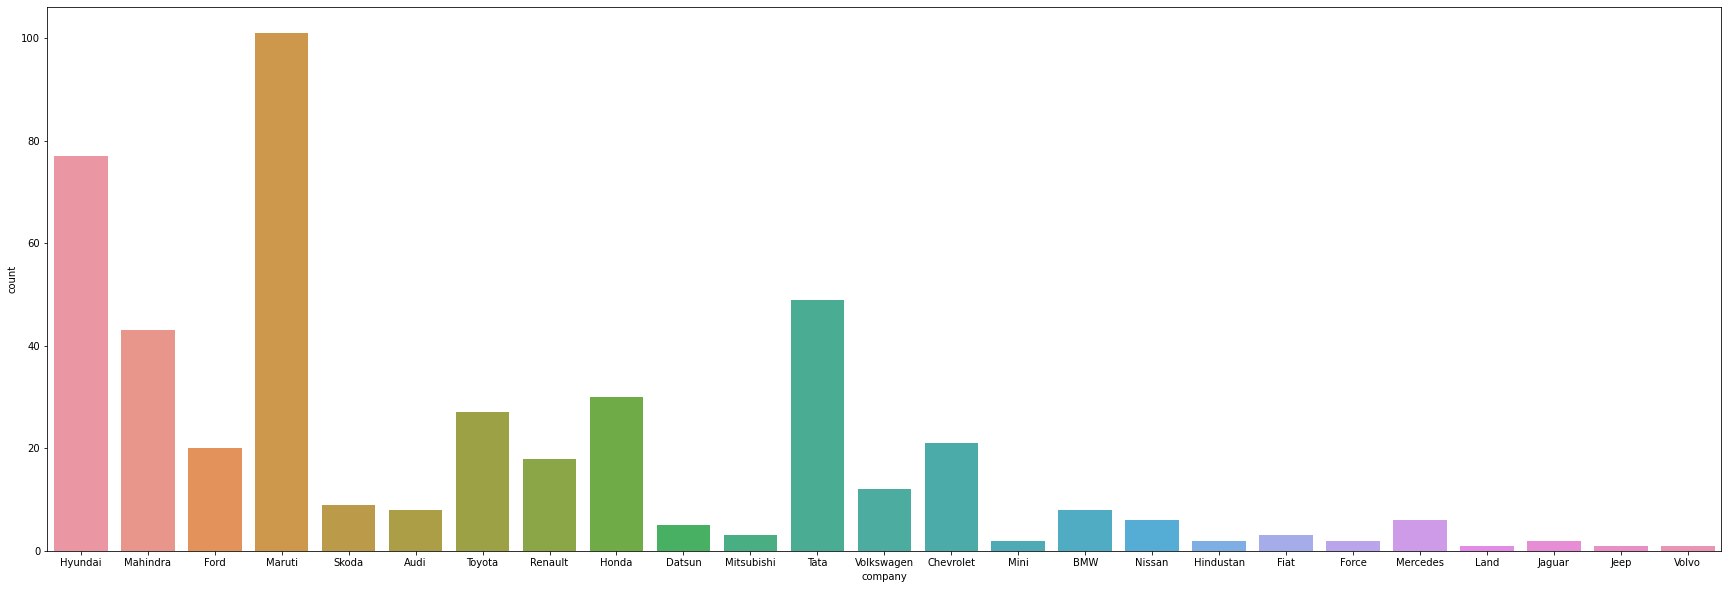

In [32]:
plt.figure(figsize=(30,10))
sns.countplot('company',data=df)

* The Count of Maruti is higher followed by Hyundai and Tata compared to other comapnies.

<AxesSubplot:ylabel='fuel_type'>

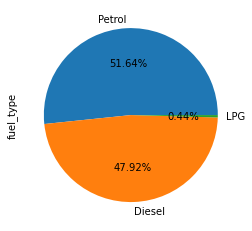

In [33]:
df['fuel_type'].value_counts().plot(kind='pie',autopct='%1.2f%%')

* From the Above Piechart we can Conclude that Most of the Cars are Of Petrol Fuel Type ie around 51.64%.

<AxesSubplot:>

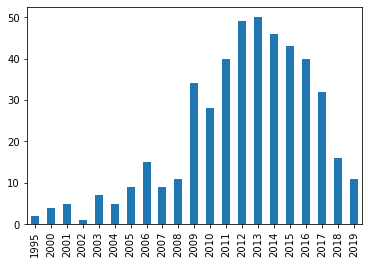

In [34]:
df.year.value_counts().sort_index().plot.bar()

* The Year 2013 has most common year of vehicles that is listen in the dataset.

<AxesSubplot:xlabel='company', ylabel='Price'>

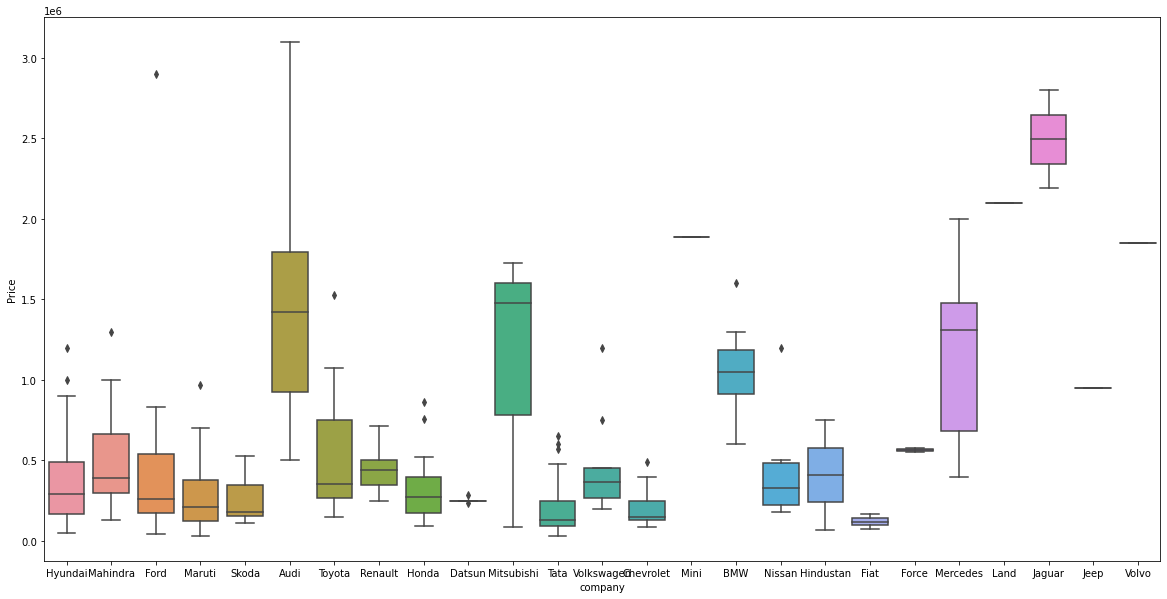

In [35]:
plt.figure(figsize=(20,10))
sns.boxplot(x='company',y='Price',data=df)

* The Price of Audi and Jaguar are Higher compare to other Companies.

<AxesSubplot:xlabel='year', ylabel='kms_driven'>

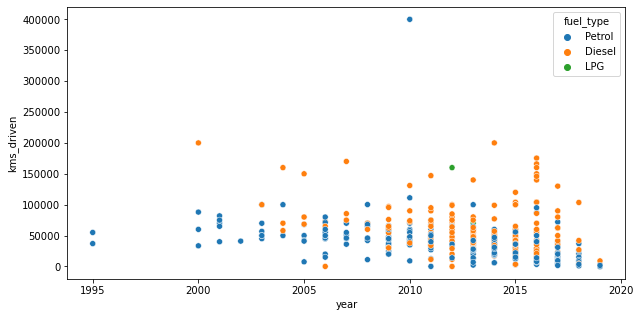

In [36]:
plt.figure(figsize=(10,5))
sns.scatterplot(df['year'],df['kms_driven'],hue=df['fuel_type'])

* Distribution of Kms Driven with respect to the year and fuel_type being used.

<AxesSubplot:xlabel='fuel_type', ylabel='Price'>

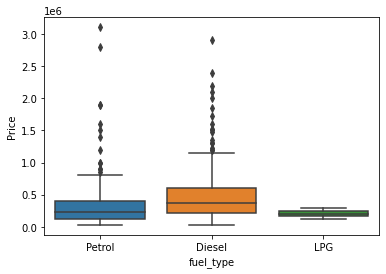

In [37]:
sns.boxplot(x='fuel_type',y='Price',data=df)

* Price of Diesel fuel type is much higher than of Petrol and LPG. 

#### Handling Outliers

<AxesSubplot:xlabel='Price'>

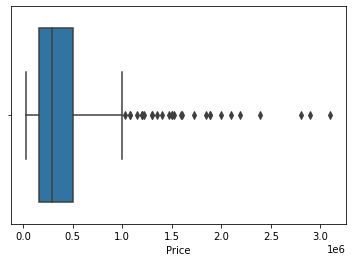

In [38]:
sns.boxplot('Price',data=df)

<AxesSubplot:xlabel='Price', ylabel='Density'>

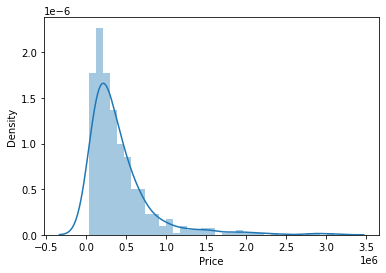

In [39]:
sns.distplot(df['Price'])

In [40]:
df['Price'].describe()

count    4.570000e+02
mean     4.098327e+05
std      4.161229e+05
min      3.000000e+04
25%      1.600000e+05
50%      2.899990e+05
75%      5.000000e+05
max      3.100000e+06
Name: Price, dtype: float64

* IQR Method

In [41]:
q1=df['Price'].quantile(0.25)
q3=df['Price'].quantile(0.75)
q1,q3

(160000.0, 500000.0)

In [42]:
iqr=q3-q1
iqr

340000.0

In [43]:
upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr

print('Upper_limit',upper_limit)
print('Lower_limit',lower_limit)

Upper_limit 1010000.0
Lower_limit -350000.0


In [44]:
df[df['Price']>upper_limit]

,name,company,year,Price,kms_driven,fuel_type
40,Mitsubishi Pajero Sport,Mitsubishi,2015,1475000,47000,Diesel
49,Mini Cooper S,Mini,2013,1891111,13000,Petrol
57,Volkswagen Vento Highline,Volkswagen,2019,1200000,3600,Diesel
70,BMW 7 Series,BMW,2009,1600000,35000,Petrol
161,Mercedes Benz GLA,Mercedes,2015,2000000,20000,Diesel
162,Land Rover Freelander,Land,2015,2100000,30000,Diesel
165,Mercedes Benz B,Mercedes,2014,1400000,31000,Petrol
169,Mini Cooper S,Mini,2013,1891111,13000,Petrol
207,Audi A4 2.0,Audi,2012,1350000,40000,Diesel
218,Toyota Fortuner,Toyota,2011,1074999,52000,Diesel


In [45]:
## Trimming

new_df=df[df['Price']<upper_limit]

In [46]:
new_df.shape

(428, 6)

<AxesSubplot:xlabel='Price', ylabel='Density'>

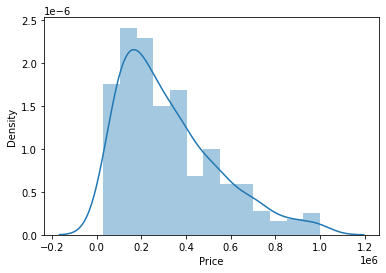

In [47]:
sns.distplot(new_df['Price'])

<AxesSubplot:xlabel='Price'>

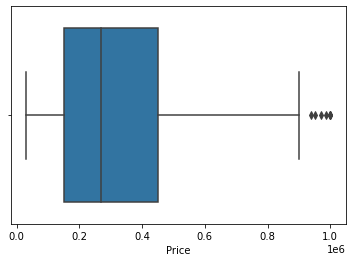

In [48]:
sns.boxplot(new_df['Price'])

In [49]:
## Capping

df_cap=df.copy()

df_cap['Price']=np.where(
    df_cap['Price']>upper_limit,
    upper_limit,
    np.where(
       df_cap['Price']<lower_limit,
       lower_limit,
       df_cap['Price']
    )
)

In [50]:
df_cap.shape

(457, 6)

<AxesSubplot:xlabel='Price', ylabel='Density'>

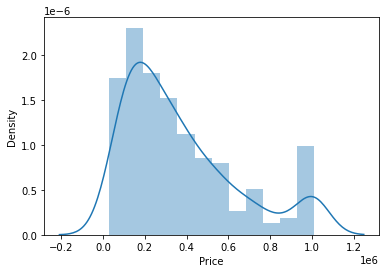

In [51]:
sns.distplot(df_cap['Price'])

<AxesSubplot:xlabel='Price'>

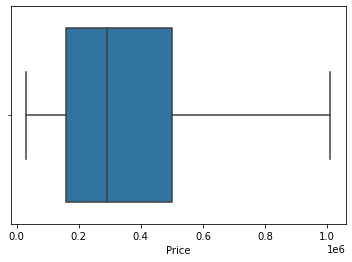

In [52]:
sns.boxplot(df_cap['Price'])

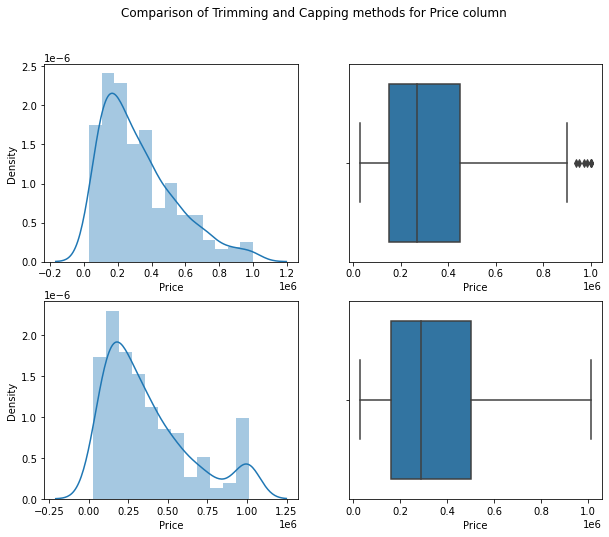

In [53]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.distplot(new_df['Price'])

plt.subplot(2,2,2)
sns.boxplot(new_df['Price'])

plt.subplot(2,2,3)
sns.distplot(df_cap['Price'])

plt.subplot(2,2,4)
sns.boxplot(df_cap['Price'])

plt.suptitle('Comparison of Trimming and Capping methods for Price column')
plt.show()

In [54]:
df_cap

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000.0,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000.0,40,Diesel
3,Hyundai Grand i10,Hyundai,2014,325000.0,28000,Petrol
4,Ford EcoSport Titanium,Ford,2014,575000.0,36000,Diesel
5,Ford Figo,Ford,2012,175000.0,41000,Diesel
...,...,...,...,...,...,...
515,Mercedes Benz C,Mercedes,2006,500001.0,15000,Petrol
516,Skoda Fabia,Skoda,2009,110000.0,45000,Petrol
518,Maruti Suzuki Ritz,Maruti,2011,270000.0,50000,Petrol
520,Tata Indica V2,Tata,2009,110000.0,30000,Diesel


<AxesSubplot:xlabel='kms_driven', ylabel='Density'>

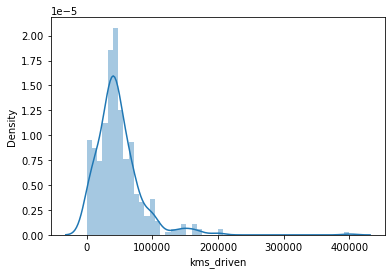

In [55]:
sns.distplot(df_cap['kms_driven'])

In [56]:
df_cap['kms_driven'].skew()

3.093254723980974

In [57]:
df_cap['kms_driven'].describe()

count       457.000000
mean      47853.577681
std       36165.048529
min           0.000000
25%       29000.000000
50%       42000.000000
75%       60000.000000
max      400000.000000
Name: kms_driven, dtype: float64

<AxesSubplot:xlabel='kms_driven'>

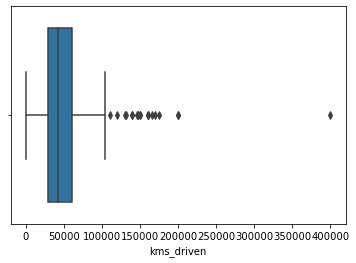

In [58]:
sns.boxplot(df_cap['kms_driven'])

In [59]:
q1=df_cap['kms_driven'].quantile(0.25)
q3=df_cap['kms_driven'].quantile(0.75)
q1,q3

(29000.0, 60000.0)

In [60]:
iqr=q3-q1
iqr

31000.0

In [61]:
upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
print('Upper Limit',upper_limit)
print('Lower Limit',lower_limit)

Upper Limit 106500.0
Lower Limit -17500.0


In [62]:
df_cap[df_cap['kms_driven']>upper_limit]

,name,company,year,Price,kms_driven,fuel_type
44,Tata Indigo eCS,Tata,2017,200000.0,130000,Diesel
102,Hindustan Motors Ambassador,Hindustan,2000,70000.0,200000,Diesel
128,Tata Indigo eCS,Tata,2016,320000.0,175430,Diesel
193,Mahindra Scorpio VLX,Mahindra,2004,230000.0,160000,Diesel
198,Mahindra Scorpio 2.6,Mahindra,2007,220000.0,170000,Diesel
222,Honda City 1.5,Honda,2010,240000.0,400000,Petrol
230,Maruti Suzuki Swift,Maruti,2016,350000.0,166000,Diesel
262,Toyota Fortuner 3.0,Toyota,2010,940000.0,131000,Diesel
263,Tata Manza ELAN,Tata,2010,155555.0,111111,Petrol
270,Honda Amaze 1.5,Honda,2016,240000.0,160000,Diesel


In [63]:
dft=df_cap[df_cap['kms_driven']<upper_limit]

<AxesSubplot:xlabel='kms_driven', ylabel='Density'>

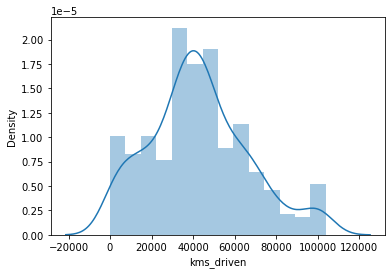

In [64]:
sns.distplot(dft['kms_driven'])

<AxesSubplot:xlabel='kms_driven'>

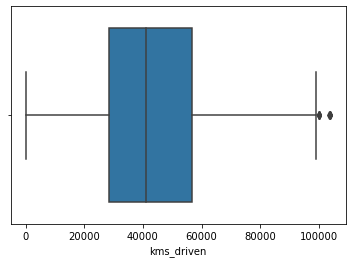

In [65]:
sns.boxplot(dft['kms_driven'])

In [66]:
## Capping

df1=df_cap.copy()

df1['kms_driven']=np.where(
    df1['kms_driven']>upper_limit,
    upper_limit,
    np.where(
       df1['kms_driven']<lower_limit,
       lower_limit,
       df1['kms_driven']
    )
)

<AxesSubplot:xlabel='kms_driven'>

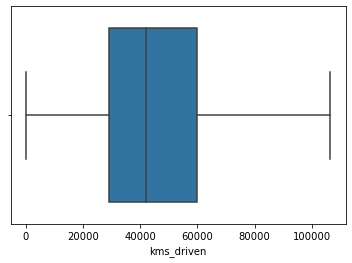

In [67]:
sns.boxplot(df1['kms_driven'])

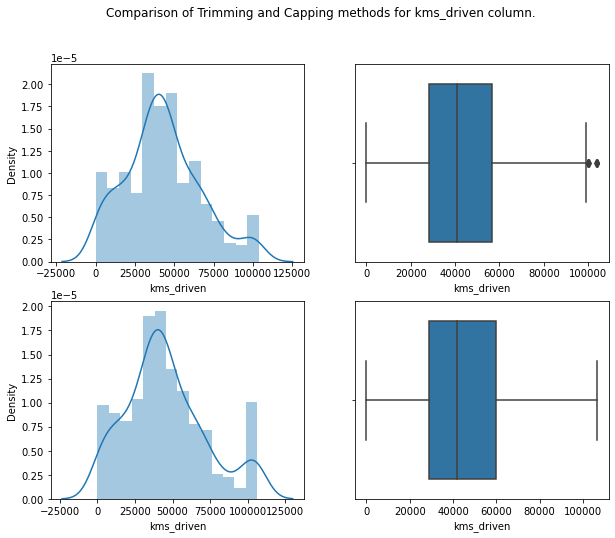

In [68]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.distplot(dft['kms_driven'])


plt.subplot(2,2,2)
sns.boxplot(dft['kms_driven'])

plt.subplot(2,2,3)
sns.distplot(df1['kms_driven'])

plt.subplot(2,2,4)
sns.boxplot(df1['kms_driven'])

plt.suptitle('Comparison of Trimming and Capping methods for kms_driven column.')
plt.show()

<AxesSubplot:xlabel='kms_driven', ylabel='Density'>

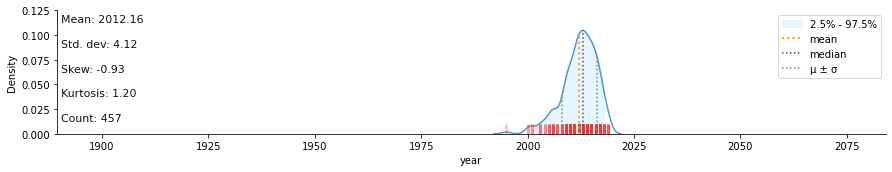

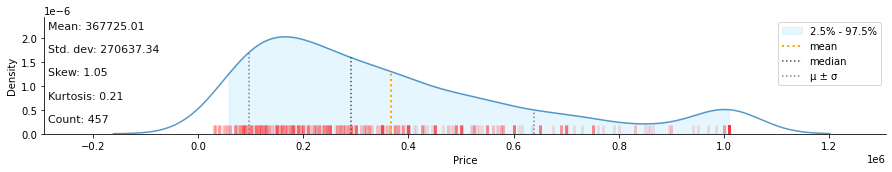

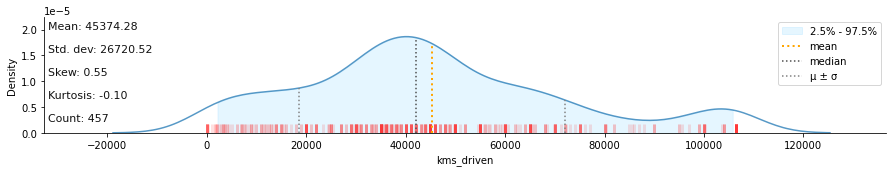

In [69]:
klib.dist_plot(df1)

In [70]:
klib.missingval_plot(df1)

No missing values found in the dataset.


<AxesSubplot:>

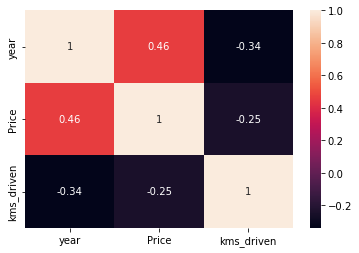

In [74]:
sns.heatmap(df1.corr(),annot=True)

In [75]:
df1.reset_index(drop=True,inplace=True)

In [76]:
df1

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000.0,45000.0,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000.0,40.0,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000.0,28000.0,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000.0,36000.0,Diesel
4,Ford Figo,Ford,2012,175000.0,41000.0,Diesel
...,...,...,...,...,...,...
452,Mercedes Benz C,Mercedes,2006,500001.0,15000.0,Petrol
453,Skoda Fabia,Skoda,2009,110000.0,45000.0,Petrol
454,Maruti Suzuki Ritz,Maruti,2011,270000.0,50000.0,Petrol
455,Tata Indica V2,Tata,2009,110000.0,30000.0,Diesel


In [77]:
X=df1.drop(columns='Price')
y=df1['Price']

In [78]:
X

,name,company,year,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,45000.0,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,40.0,Diesel
2,Hyundai Grand i10,Hyundai,2014,28000.0,Petrol
3,Ford EcoSport Titanium,Ford,2014,36000.0,Diesel
4,Ford Figo,Ford,2012,41000.0,Diesel
...,...,...,...,...,...
452,Mercedes Benz C,Mercedes,2006,15000.0,Petrol
453,Skoda Fabia,Skoda,2009,45000.0,Petrol
454,Maruti Suzuki Ritz,Maruti,2011,50000.0,Petrol
455,Tata Indica V2,Tata,2009,30000.0,Diesel


In [79]:
y

0       80000.0
1      425000.0
2      325000.0
3      575000.0
4      175000.0
         ...   
452    500001.0
453    110000.0
454    270000.0
455    110000.0
456    260000.0
Name: Price, Length: 457, dtype: float64

### Model Building
#### Splitting Data into Train and Test

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [82]:
X_train.shape

(365, 5)

In [83]:
X_test.shape

(92, 5)

In [84]:
y_test.shape

(92,)

In [85]:
y_train.shape

(365,)

In [86]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()

In [87]:
ohe.fit(X[['name','company','fuel_type']])

OneHotEncoder()

#### Creating an OneHotEncoder object to contain all the possible categories.

In [88]:
ohe.categories_

[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
        'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
        'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
        'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat Diesel',
        'Chevrolet Beat LS', 'Chevrolet Beat LT', 'Chevrolet Beat PS',
        'Chevrolet Cruze LTZ', 'Chevrolet Enjoy', 'Chevrolet Enjoy 1.4',
        'Chevrolet Sail 1.2', 'Chevrolet Sail UVA', 'Chevrolet Spark',
        'Chevrolet Spark 1.0', 'Chevrolet Spark LS', 'Chevrolet Spark LT',
        'Chevrolet Tavera LS', 'Chevrolet Tavera Neo', 'Datsun GO T',
        'Datsun Go Plus', 'Datsun Redi GO', 'Fiat Linea Emotion',
        'Fiat Petra ELX', 'Fiat Punto Emotion', 'Force Motors Force',
        'Force Motors One', 'Ford EcoSport', 'Ford EcoSport Ambiente',
        'Ford EcoSport Titanium', 'Ford EcoSport Trend',
        'Ford Endeavor 4x4', 'Ford Fiesta', 'Ford Fiesta SXi', 'Ford Figo',
        '

In [89]:
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [90]:
transformer=make_column_transformer(
                            (OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
                             remainder='passthrough')

#### Linear Regression

In [91]:
from sklearn.linear_model import LinearRegression
linear=LinearRegression()

In [92]:
pipe=make_pipeline(transformer,linear)

In [93]:
## Display Pipeline
from sklearn import set_config
set_config(display='diagram')

In [94]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [95]:
y_pred=pipe.predict(X_test)

In [96]:
from sklearn.metrics import r2_score

In [97]:
r2_score(y_test,y_pred)

0.7848857944432922

#### Lasso Regression

In [98]:
from sklearn.linear_model import Lasso
Las=Lasso(normalize=True,alpha=10)
pipe=make_pipeline(transformer,Las)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.7178112930300353

#### Ridge Regression

In [99]:
from sklearn.linear_model import Ridge
Rid=Ridge(solver='auto',alpha=0.1)
pipe=make_pipeline(transformer,Rid)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.04558667283741136

#### XGBoostRegressor

In [100]:
from xgboost import XGBRegressor
Xgb=XGBRegressor()
pipe=make_pipeline(transformer,Xgb)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.7689111003408343

#### Finding the model with a random state of Train Test Split. 

In [101]:
scores=[]
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    linear=LinearRegression()
    pipe=make_pipeline(transformer,linear)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [102]:
np.argmax(scores)

321

In [103]:
scores[np.argmax(scores)]

0.8105446204092484

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=np.argmax(scores))
linear=LinearRegression()
pipe=make_pipeline(transformer,linear)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.8105446204092484

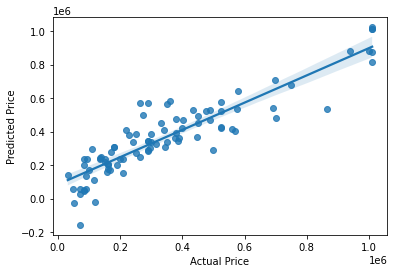

In [105]:
sns.regplot(x=y_test,y=y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

In [106]:
from sklearn import metrics
print("MAE",metrics.mean_absolute_error(y_test,y_pred))
print('MSE', metrics.mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE 83334.86747111939
MSE 12522729028.475904
RMSE 111905.0000155306


In [107]:
X_test.shape

(92, 5)

In [108]:
print('R2_Score:',r2_score(y_test,y_pred))
r2=r2_score(y_test,y_pred)

R2_Score: 0.8105446204092484


In [109]:
adjusted_r2=1-((1-r2)*(92-1)/(92-1-5))
print('Adjusted R Squared:',adjusted_r2)

Adjusted R Squared: 0.7995297727586232


In [110]:
r2_score(y_test,y_pred)

0.8105446204092484

In [111]:
pipe.predict(pd.DataFrame(columns=['name','company','year','kms_driven','fuel_type'],
                          data=np.array(['Maruti Suzuki Swift','Maruti',2017,100,'Petrol']).reshape(1,5)))

array([428737.56832651])

#### The model to predict the price of a 2017 Maruti Suzuki Swift, petrol variant, driven only for 100kms which estimated to be about 4.28 lakh.

### Conclusion:

* **Most of the Cars are Disesel Fuel Type.**
* **The Price of the Car and Year of Purchase are correlated to each other.**
* **The Model predicted with 0.81 accuracy.**
* **After Data Preprocessing , EDA and fitting Linear Regression model to predict the price of a 2017 Maruti Suzuki Swift,            petrol variant, driven only for 100kms which estimated to be about 4.28 lakh.**